by Elvira Zainulina

In [2]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from IPython.display import clear_output

In [3]:
cfg = rs.config()
cfg.enable_device_from_file("../data/435.bag")
cfg.enable_stream(rs.stream.depth, 848, 480, rs.format.z16, 30)
cfg.enable_stream(rs.stream.color, 848, 480, rs.format.bgr8, 30)
pipe = rs.pipeline()
profile = pipe.start(cfg)

In [4]:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

(480, 848, 3)


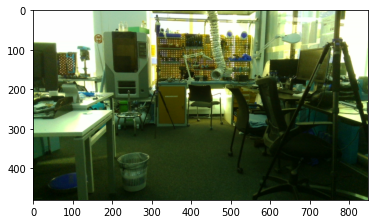

In [11]:
color = np.asanyarray(color_frame.get_data())
print(color.shape)
plt.imshow(color)

Match keypoints with SIFT

In [12]:
def match_keypoints(des1, des2, kp1, kp2, k=2, thrsh=0.75):
    
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=k)
    
    good = [match[0] for match in matches 
            if match[0].distance < thrsh * match[1].distance]
    
    match_kp = [[kp1[match.queryIdx], kp2[match.trainIdx]] for match in good]
        
    return np.array(good), np.array(match_kp)

In [13]:
cur_time = 0
im1 = np.ones(1)
im2 = np.ones(1)
depth_image = np.ones(1)
sift = cv2.xfeatures2d.SIFT_create()
i = 0
while True:
    im1 = im2.copy()
    depth_image0 = depth_image.copy()
    frameset = pipe.wait_for_frames()
    color_frame = frameset.get_color_frame()
    depth_frame = frameset.get_depth_frame()
    pc = rs.pointcloud()
    pc.map_to(color_frame);
    pointcloud = pc.calculate(depth_frame);
    if depth_frame.get_timestamp() < cur_time:
        break
    cur_time = depth_frame.get_timestamp()
    color = np.asanyarray(color_frame.get_data())
    depth_image = np.asanyarray(depth_frame.get_data())
    depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
    im2 = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
    if i > 0:
        kp1, des1 = sift.detectAndCompute(im1, None)
        kp2, des2 = sift.detectAndCompute(im2, None)
        des1 = np.array([des1[j] for j in range(len(kp1)) if 
                         depth_image0[round(kp1[j].pt[1]), round(kp1[j].pt[0])] != 0])
        kp1 = [kp for kp in kp1 if 
               depth_image0[round(kp.pt[1]), round(kp.pt[0])] != 0]
        des2 = np.array([des2[j] for j in range(len(kp2)) if 
                         depth_image[round(kp2[j].pt[1]), round(kp2[j].pt[0])] != 0])
        kp2 = [kp for kp in kp2 if 
               depth_image[round(kp.pt[1]), round(kp.pt[0])] != 0]
        matches, match_kp = match_keypoints(des1, des2, kp1, kp2, thrsh=0.3)
        
        img = cv2.drawMatches(im1, kp1, im2, kp2, matches, None)
        
        clear_output(wait=True)
    #     plt.imshow(color)
    #     plt.show
        plt.figure(figsize=(16, 10))
        plt.imshow(img)
        plt.show()
        print('current frame timestamp', cur_time)
    i += 1

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [14]:
[*match_kp[0][0].pt]

NameError: name 'match_kp' is not defined

In [15]:
src = rs.rs2_deproject_pixel_to_point(color_frame.profile.as_video_stream_profile().intrinsics,
                                      [*match_kp[0][0].pt][::-1], depth_image[round(match_kp[0][0].pt[1]), round(match_kp[0][0].pt[0])])

NameError: name 'match_kp' is not defined

In [16]:
src

NameError: name 'src' is not defined

In [17]:
dst = rs.rs2_deproject_pixel_to_point(depth_frame.profile.as_video_stream_profile().intrinsics,
                                      [*match_kp[0][1].pt][::-1], depth_image[round(match_kp[0][1].pt[1]), round(match_kp[0][1].pt[0])])

NameError: name 'match_kp' is not defined

In [18]:
dst

NameError: name 'dst' is not defined

(480, 848)


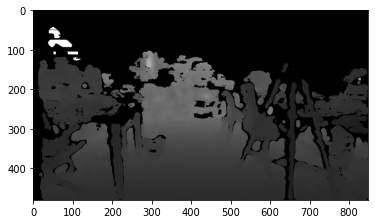

In [19]:
depth_image = np.asanyarray(depth_frame.get_data())
depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
print(depth_image.shape)
plt.imshow(depth_image, cmap='gray')

In [20]:
depth_image.min()

0

Find pointclouds with rs

In [1]:
import open3d as o3d

In [5]:
pc = rs.pointcloud();
pc.map_to(color_frame);
pointcloud = pc.calculate(depth_frame);
pointcloud.export_to_ply("1.ply", color_frame);

In [6]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("1.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

Load a ply point cloud, print it, and render it
geometry::PointCloud with 294158 points.
[[-3.52783656  2.01347136 -3.64900017]
 [-3.49994779  2.00243568 -3.62900019]
 [-3.47311544  1.99195158 -3.61000013]
 ...
 [ 1.29626    -0.76526666 -1.32600009]
 [ 1.29938519 -0.76526666 -1.32600009]
 [ 1.30251038 -0.76526666 -1.32600009]]


In [7]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from pyntcloud.pyntcloud import PyntCloud # open source library for 3D pointcloud visualisation
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

ModuleNotFoundError: No module named 'pyntcloud.pyntcloud'

In [9]:
from pyntcloud import PyntCloud

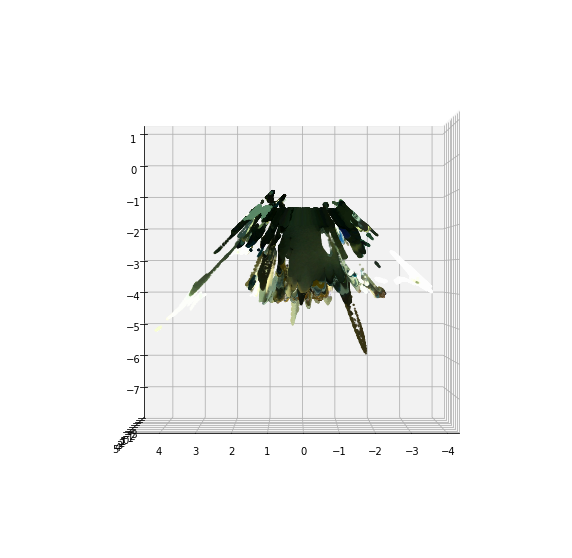

AttributeError: 'PyntCloud' object has no attribute 'ion'

In [11]:
pc = rs.pointcloud();
pc.map_to(color_frame);
pointcloud = pc.calculate(depth_frame);
# pointcloud.export_to_ply("1.ply", color_frame);
cloud = PyntCloud.from_file("1.ply");
cloud.plot()


In [17]:
vertices = np.asarray(pointcloud.get_vertices())
tex_coords = np.asarray(pointcloud.get_texture_coordinates())
vs = []
ts = []
for i in range(pointcloud.size()):
    if vertices[i][2]:
        vs.append([*vertices[i]])
        ts.append([*tex_coords[i]])

In [18]:
vs = np.array(vs)
ts = np.array(ts)
# vs[:, 1] *= -1
# vs[:, 2] *= -1

Project found points to pixels

In [19]:
vs_c = [rs.rs2_project_point_to_pixel(depth_frame.profile.as_video_stream_profile().intrinsics,
                             vs[i].tolist()) for i in range(len(vs))]

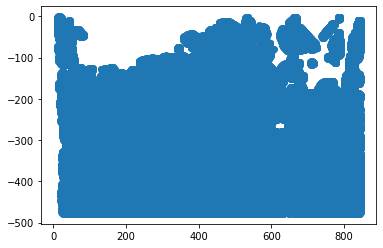

In [20]:
vs_c = np.array(vs_c)
plt.scatter(vs_c[:, 0], vs_c[:, 1]*(-1))

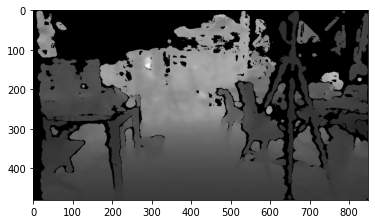

In [21]:
plt.imshow(cv2.convertScaleAbs(np.asanyarray(depth_frame.get_data()), alpha=0.03), cmap='gray')
# plt.scatter(vs_c[:, 0], vs_c[:, 1])
plt.show()

Find corresponding points in poinclouds by ICP registration.

In [22]:
pcs = []
i = 0
while True:
    frameset = pipe.wait_for_frames()
    color_frame = frameset.get_color_frame()
    depth_frame = frameset.get_depth_frame()
    pc = rs.pointcloud()
    pc.map_to(color_frame);
    pointcloud = pc.calculate(depth_frame);
    pointcloud.export_to_ply(str(i)+".ply", color_frame);
    if depth_frame.get_timestamp() < cur_time or i == 1:
        break
    cur_time = depth_frame.get_timestamp()
    color = np.asanyarray(color_frame.get_data())
    
    clear_output(wait=True)
    plt.imshow(color)
    plt.show
    print('current frame timestamp', cur_time)
    i += 1

In [23]:
pcd0 = o3d.io.read_point_cloud("0.ply")
print(pcd0)
print(np.asarray(pcd0.points))
o3d.visualization.draw_geometries([pcd0])
pcd1 = o3d.io.read_point_cloud("1.ply")
print(pcd1)
print(np.asarray(pcd1.points))
o3d.visualization.draw_geometries([pcd1])

geometry::PointCloud with 295543 points.
[[-3.4449749   1.97098374 -3.57200027]
 [-3.41827679  1.96049976 -3.55300021]
 [ 0.99772245  2.22921991 -4.03999996]
 ...
 [ 1.26595533 -0.74737579 -1.29500008]
 [ 1.27194715 -0.74910718 -1.2980001 ]
 [ 1.27697086 -0.75026137 -1.30000007]]
geometry::PointCloud with 287605 points.
[[-3.57423353  2.03499103 -3.6880002 ]
 [-3.56554151  2.03499103 -3.6880002 ]
 [-3.55684948  2.03499103 -3.6880002 ]
 ...
 [ 1.31385636 -0.77565485 -1.3440001 ]
 [ 1.31408405 -0.77392352 -1.34100008]
 [ 1.31528008 -0.77276927 -1.33900011]]


In [33]:
res = o3d.registration.registration_icp(pcd0, pcd1, 1.0)

In [34]:
res.transformation

array([[ 0.99997618,  0.00664498,  0.00186877,  0.01117579],
       [-0.00669243,  0.99962242,  0.02665006,  0.02809035],
       [-0.00169098, -0.02666193,  0.99964308, -0.0131754 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [36]:
np.asarray(res.correspondence_set)

array([[148894, 135129],
       [148895, 134489],
       [148896, 134490],
       ...,
       [ 74444,  59927],
       [ 74445,  59928],
       [ 74446,  59293]], dtype=int32)

In [48]:
points = np.asarray(pcd0.points)[np.asarray(res.correspondence_set)[:, 0]]

In [49]:
o3d.visualization.draw_geometries([pcd0, pcd1])

In [50]:
pcd0

geometry::PointCloud with 297788 points.

In [56]:
o3d.visualization.draw_geometries_with_vertex_selection([pcd0])